<a href="https://colab.research.google.com/github/RounakMishra9905/BCS-Lluminating-Language/blob/main/Rounak_Mishra(230876)/Week1/Week1_Rounak_Mishra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from gensim import models
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score, roc_auc_score, confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
data = pd.read_csv("/content/drive/MyDrive/https:  github.com udbhav-44 BCS-Lluminating-Language/movie.csv")

In [20]:
data.head()


,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [21]:
null_values = data.isnull().sum()
print(null_values)
if null_values.sum()==0:
  print("There are no null entries in any column.")
else:
  data.dropna(axis=1,inplace=True)

text     0
label    0
dtype: int64
There are no null entries in any column.


In [22]:
zeros=0
ones=0
others=0
for _ in data['label']:
  if _==0:
    zeros+=1
  elif _==1:
    ones+=1
  else:
    others+=1
print(zeros)
print(ones)
print(others)
if others==0:
  print("So there are no inconsistencies in the data.")
print("The data is balanced as can be seen from the number of zeros and ones.")



20019
19981
0
So there are no inconsistencies in the data.
The data is balanced as can be seen from the number of zeros and ones.


In [23]:
duplicateRows = data[data.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRows)
#Reference:https://www.projectpro.io/recipes/read-csv-data-from-local-system-and-remove-extra-columns-and-change-date-formats
data.drop_duplicates(inplace=True)

Duplicate Rows except first occurrence based on all columns are :
                                                    text  label
2164   I find it rather useless to comment on this "m...      0
3236   An absolutely atrocious adaptation of the wond...      0
3428   When I first saw this film it was not an impre...      0
3652   Before I watched this tv movie I did not know ...      1
3787   What a clunker!<br /><br />It MUST have been m...      0
...                                                  ...    ...
39229  I Enjoyed Watching This Well Acted Movie Very ...      1
39246  You do realize that you've been watching the E...      0
39508  (Spoilers)<br /><br />Oh sure it's based on Mo...      0
39681  It's been a long time since I last saw a movie...      0
39746  Goodnight, Mister Tom begins in an impossibly ...      0

[277 rows x 2 columns]


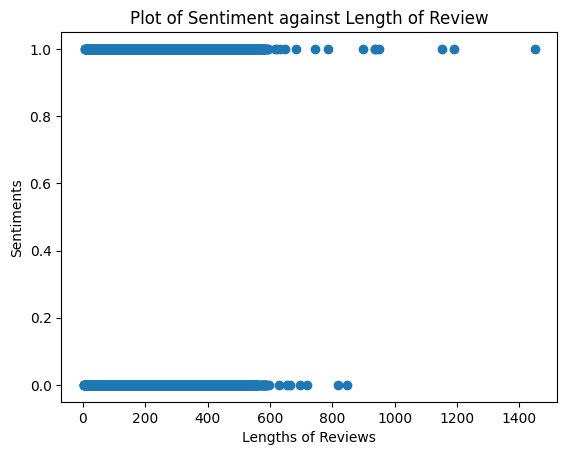

In [41]:
Lengths_of_reviews=[]
sentiments=[]
for _ in data["text"]:
  word_count=len(nltk.word_tokenize(_))
  Lengths_of_reviews.append(word_count)
for _ in data["label"]:
  sentiments.append(_)
plt.scatter(Lengths_of_reviews,sentiments)
plt.xlabel('Lengths of Reviews')
plt.ylabel('Sentiments')
plt.title('Plot of Sentiment against Length of Review')
plt.show()



In [24]:
#From stackoverflow https://stackoverflow.com/a/49146722
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r' ', string)

def remove_unwanted(document):

    # remove user mentions
    document = re.sub("@[A-Za-z0-9_]+"," ", document)
    # remove URLS
    document = re.sub(r'http\S+', ' ', document)
    # remove hashtags
    document = re.sub("#[A-Za-z0-9_]+","", document)
    # remove emoji's
    document = remove_emoji(document)
    # remove punctuation
    document = re.sub("[^0-9A-Za-z ]", "" , document)
    # remove double spaces
    document = document.replace('  ',"")

    return document.strip()

In [25]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
def data_pre_processing(text):
    text=remove_emoji(text)
    text=remove_unwanted(text)
    tokens=word_tokenize(text)
    filtered_tokens=[word.lower() for word in tokens if word.lower() not in stop_words]
    processed_text=' '.join(filtered_tokens)
    return processed_text
data['text'] = data['text'].apply(data_pre_processing)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
data.head()

,text,label
0,grew b 1965 watching loving thunderbirds mates...,0
1,put movie dvd player sat coke chips expectatio...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movies bor...,0
4,im die hard dads army fan nothing ever change ...,1


In [27]:
stemmer=PorterStemmer()
def stemmer1(text):
    tokens=word_tokenize(text)
    filtered_tokens=[stemmer.stem(word) for word in tokens]
    processed_text=' '.join(filtered_tokens)
    return processed_text
data['text'] = data['text'].apply(stemmer1)
data.head()

,text,label
0,grew b 1965 watch love thunderbird mate school...,0
1,put movi dvd player sat coke chip expect hope ...,0
2,peopl know particular time past like feel need...,0
3,even though great interest biblic movi bore de...,0
4,im die hard dad armi fan noth ever chang got t...,1


In [28]:
X=data["text"].tolist()
y=data["label"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=104)

In [29]:
sentences=X_train
tokenizer=Tokenizer(num_words=2000000)
tokenizer.fit_on_texts(sentences)
word_index=tokenizer.word_index
print(word_index)

{'br': 1, 'movi': 2, 'film': 3, 'one': 4, 'like': 5, 'time': 6, 'good': 7, 'make': 8, 'get': 9, 'see': 10, 'charact': 11, 'watch': 12, 'even': 13, 'stori': 14, 'would': 15, 'realli': 16, 'scene': 17, 'show': 18, 'look': 19, 'well': 20, 'much': 21, 'end': 22, 'peopl': 23, 'also': 24, 'love': 25, 'great': 26, 'go': 27, 'bad': 28, 'think': 29, 'play': 30, 'first': 31, 'dont': 32, 'way': 33, 'act': 34, 'thing': 35, 'could': 36, 'made': 37, 'know': 38, 'say': 39, 'seem': 40, 'mani': 41, 'plot': 42, 'seen': 43, 'work': 44, 'want': 45, 'come': 46, 'actor': 47, 'two': 48, 'never': 49, 'take': 50, 'littl': 51, 'tri': 52, 'best': 53, 'year': 54, 'life': 55, 'ever': 56, 'give': 57, 'man': 58, 'better': 59, 'still': 60, 'find': 61, 'perform': 62, 'feel': 63, 'actual': 64, 'use': 65, 'part': 66, 'someth': 67, 'lot': 68, 'back': 69, 'im': 70, 'interest': 71, 'real': 72, 'director': 73, 'guy': 74, 'didnt': 75, 'doesnt': 76, 'anoth': 77, 'live': 78, 'enjoy': 79, 'though': 80, 'music': 81, 'cast': 82, 

In [31]:
#Wordtovec model will be the best here as it considers the semantic meaning of words(source-google) and I am obviously applying it separately on the tokenized training set and non tokenized test set in the next cell.
training_reviews=sentences
training_model=Word2Vec(sentences=training_reviews, window=10, min_count=1, workers=4)
training_model.save("word2vec_training_model.bin")
word2Vec_model_training = Word2Vec.load("word2vec_training_model.bin")
def training_embedding(text):
    tokens=word_tokenize(text)
    review_trained = [training_model.wv[word] for word in tokens if word in training_model.wv]
    if review_trained:
        review_embedding = sum(review_trained) / len(review_trained)
    else:
        review_embedding = [0] * word2Vec_model_training.vector_size
    return review_embedding
sentences=[training_embedding(sentence) for sentence in sentences]






In [32]:
testing_reviews=X_test
testing_model=Word2Vec(sentences=testing_reviews, window=10, min_count=1, workers=4)
testing_model.save("word2vec_testing_model.bin")
word2Vec_model_testing = Word2Vec.load("word2vec_testing_model.bin")
def testing_embedding(text):
    tokens=word_tokenize(text)
    review_trained = [testing_model.wv[word] for word in tokens if word in testing_model.wv]
    if review_trained:
        review_embedding = sum(review_trained) / len(review_trained)
    else:
        review_embedding = [0] * word2Vec_model_testing.vector_size
    return review_embedding
X_test=[training_embedding(sentence) for sentence in X_test]




In [33]:
#Logistic Regression:
LR=LogisticRegression(max_iter=10000)#I increased the max iterations as it gave an error like max iteration limit reached
LR.fit(sentences, y_train)
y_pred=LR.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
f1=f1_score(y_test,y_pred)
print("F1 Score:",f1)
roc_auc=roc_auc_score(y_test,y_pred)
print("ROC AUC Score:",roc_auc)
conf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.5571442956399154
F1 Score: 0.6662112932604736
ROC AUC Score: 0.5550294109129563
Confusion Matrix:
[[1144 3789]
 [ 609 4389]]


In [34]:
#Bernoulli naives Classifier(Source-Geeks for geeks):
bnb=BernoulliNB(binarize=0.0)
model=bnb.fit(sentences, y_train)
y_pred1=bnb.predict(X_test)
accuracy=accuracy_score(y_test,y_pred1)
print("Accuracy:",accuracy)
f1_1=f1_score(y_test,y_pred1)
print("F1 Score:",f1_1)
roc_auc1=roc_auc_score(y_test,y_pred1)
print("ROC AUC Score:",roc_auc1)
conf_matrix1=confusion_matrix(y_test,y_pred1)
print("Confusion Matrix:")
print(conf_matrix1)



Accuracy: 0.541033128587252
F1 Score: 0.6331294269156471
ROC AUC Score: 0.5394131907780344
Confusion Matrix:
[[1440 3493]
 [1065 3933]]


In [35]:
#SVM
svm=SVC()
svm.fit(sentences, y_train)
y_pred2=svm.predict(X_test)
accuracy=accuracy_score(y_test,y_pred2)
print("Accuracy:",accuracy)
f1_2=f1_score(y_test,y_pred2)
print("F1 Score:",f1_2)
roc_auc2=roc_auc_score(y_test,y_pred2)
print("ROC AUC Score:",roc_auc2)
conf_matrix2=confusion_matrix(y_test,y_pred2)
print("Confusion Matrix:")
print(conf_matrix2)

Accuracy: 0.5550297049642533
F1 Score: 0.6643882433356118
ROC AUC Score: 0.55292066147359
Confusion Matrix:
[[1138 3795]
 [ 624 4374]]


In [36]:
#Decision Tree Classifier
dt_classifier=DecisionTreeClassifier(random_state=104)
dt_classifier.fit(sentences,y_train)
y_pred3=dt_classifier.predict(X_test)
accuracy3=accuracy_score(y_test,y_pred3)
print("Accuracy:",accuracy3)
f1_3=f1_score(y_test,y_pred3)
print("F1 Score:",f1_3)
roc_auc3=roc_auc_score(y_test,y_pred2)
print("ROC AUC Score:",roc_auc3)
conf_matrix3=confusion_matrix(y_test,y_pred3)
print("Confusion Matrix:")
print(conf_matrix3)

Accuracy: 0.5523109455241164
F1 Score: 0.6607660613459484
ROC AUC Score: 0.55292066147359
Confusion Matrix:
[[1155 3778]
 [ 668 4330]]


In [37]:
#Neural Networks(source-FreeCodeCamp):
NNmodel=Sequential([
    Dense(32,activation='relu',input_shape=(100,)),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid'),
])
NNmodel.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
y_train1=y_train.tolist()#[Was getting a value error,ao did this]
NNmodel.fit(sentences, y_train1,batch_size=32, epochs=100)



Epoch 1/100
931/931 [==============================] - 2s 2ms/step - loss: 0.6847 - accuracy: 0.5466
Epoch 2/100
931/931 [==============================] - 1s 1ms/step - loss: 0.6819 - accuracy: 0.5497
Epoch 3/100
931/931 [==============================] - 1s 1ms/step - loss: 0.6810 - accuracy: 0.5506
Epoch 4/100
931/931 [==============================] - 1s 1ms/step - loss: 0.6804 - accuracy: 0.5506
Epoch 5/100
931/931 [==============================] - 2s 2ms/step - loss: 0.6801 - accuracy: 0.5508
Epoch 6/100
931/931 [==============================] - 2s 2ms/step - loss: 0.6798 - accuracy: 0.5520
Epoch 7/100
931/931 [==============================] - 1s 1ms/step - loss: 0.6798 - accuracy: 0.5522
Epoch 8/100
931/931 [==============================] - 1s 1ms/step - loss: 0.6795 - accuracy: 0.5520
Epoch 9/100
931/931 [==============================] - 1s 2ms/step - loss: 0.6794 - accuracy: 0.5523
Epoch 10/100
931/931 [==============================] - 1s 1ms/step - loss: 0.6792 - accura

In [38]:
y_pred4=NNmodel.predict(X_test)
y_pred4_binary=np.where(y_pred4 >= 0.5, 1, 0)#[Was getting a value error,ao did this]
accuracy4=accuracy_score(y_test,y_pred4_binary)
print("Accuracy:",accuracy4)
f1_4=f1_score(y_test,y_pred4_binary)
print("F1 Score:",f1_4)
roc_auc4=roc_auc_score(y_test,y_pred4_binary)
print("ROC AUC Score:",roc_auc4)
conf_matrix4=confusion_matrix(y_test,y_pred4_binary)
print("Confusion Matrix:")
print(conf_matrix4)

311/311 [==============================] - 0s 1ms/step
Accuracy: 0.557547074816232
F1 Score: 0.6672724519157959
ROC AUC Score: 0.5554124345866464
Confusion Matrix:
[[1131 3802]
 [ 592 4406]]


In [42]:
#All the models seem to give pretty similar results here.